## Craft a Story from a Dataset

Make sure that your story is appropriate to the audience type you selected.

Submit links to a GitHub repository containing a Jupyter Notebook or a PowerPoint. The file should contain:

1. The questions you asked
2. The trends you investigated
3. The resulting visualizations and conclusions

Exercise Steps
1. Select a dataset - any dataset! Make sure it's not too dirty, as this case study is
about storytelling, not cleaning... :)
2. Pick your audience: executive, technical, or non-technical; and adjust your tone
accordingly.
3. Take a look at the data: explore it.
4. Think of a narrative, and pursue it.
5. Give a 15 mins presentation to your mentor during your next call. 

In your quest, you might need to ask a bunch of other questions, such as:

● Can I count something interesting?

● Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?

● Can I make a bar plot or a histogram?

● Can I compare two related quantities? 

● Can I make a scatterplot?

● Can I make a time-series plot?

● Looking at the plots, what are some insights I can make?

● Can I see any correlations?

● Is there a hypothesis I can - and should - investigate further?

● What other questions are the insights leading me to ask? 

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import os
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from dython.nominal import associations, numerical_encoding, cluster_correlations
from dython.data_utils import split_hist

from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go


In [254]:
sns.set_theme(style='whitegrid', palette='pastel')

In [255]:
url = "https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv"
data = pd.read_csv(url)
df = data.copy()

# make sure it is still updating as a copy

In [256]:
df.describe()

id          age    longitude     latitude
count  7682.000000  7210.000000  6847.000000  6847.000000
mean   4242.970711    37.161997   -97.057301    36.668453
std    2398.990239    12.951797    16.593304     5.394855
min       3.000000     2.000000  -160.007000    19.498000
25%    2153.250000    27.000000  -112.040500    33.478500
50%    4267.500000    35.000000   -94.249000    36.095000
75%    6322.750000    45.000000   -83.080500    40.026500
max    8357.000000    92.000000   -67.867000    71.301000

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7682 entries, 0 to 7681
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7682 non-null   int64  
 1   name                     7275 non-null   object 
 2   date                     7682 non-null   object 
 3   manner_of_death          7682 non-null   object 
 4   armed                    7473 non-null   object 
 5   age                      7210 non-null   float64
 6   gender                   7663 non-null   object 
 7   race                     6244 non-null   object 
 8   city                     7682 non-null   object 
 9   state                    7682 non-null   object 
 10  signs_of_mental_illness  7682 non-null   bool   
 11  threat_level             7682 non-null   object 
 12  flee                     6819 non-null   object 
 13  body_camera              7682 non-null   bool   
 14  longitude               

In [258]:
df.head(5)

id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  longitude  latitude  is_geocoding_exact  
0  Not fleeing        False   -123.122    47.247                True  
1  Not fleeing        False   -122.892    45.487                True  
2  Not fleeing        False    -97.281    37.695                True  
3  Not fleeing        False   -122.422    37.763                True  
4  Not fleeing        False   -104.692    40.384                True

In [259]:
df.isna().sum()

id                            0
name                        407
date                          0
manner_of_death               0
armed                       209
age                         472
gender                       19
race                       1438
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        863
body_camera                   0
longitude                   835
latitude                    835
is_geocoding_exact            0
dtype: int64

In [260]:
df['date'].max()
# downloaded dataframe earlier than this?

'2022-08-23'

In [261]:
nunique = df.nunique().sort_values()
print('Number of Unique Values by Column' + '\n')
nunique

Number of Unique Values by Column



is_geocoding_exact            2
body_camera                   2
manner_of_death               2
gender                        2
signs_of_mental_illness       2
threat_level                  3
flee                          4
race                          6
state                        51
age                          81
armed                       103
date                       2604
city                       3143
latitude                   5298
longitude                  5998
name                       7242
id                         7682
dtype: int64

In [262]:
# unique values in column
columns = df.columns
print('List of Unique Values by Column' + '\n' + '\n')
for col in columns:
    print(f'{col}:  {str(df[col].unique())} \n')

List of Unique Values by Column


id:  [   3    4    5 ... 8355 8356 8357] 

name:  ['Tim Elliot' 'Lewis Lee Lembke' 'John Paul Quintero' ...
 'Mable Arrington' 'Elizabeth A. Delano' 'Geraldo Reyes'] 

date:  ['2015-01-02' '2015-01-03' '2015-01-04' ... '2022-08-21' '2022-08-22'
 '2022-08-23'] 

manner_of_death:  ['shot' 'shot and Tasered'] 

armed:  ['gun' 'unarmed' 'toy weapon' 'nail gun' 'knife' nan 'shovel' 'vehicle'
 'hammer' 'hatchet' 'sword' 'machete' 'box cutter' 'undetermined'
 'metal object' 'screwdriver' 'lawn mower blade' 'flagpole'
 'guns and explosives' 'cordless drill' 'crossbow' 'BB gun' 'metal pole'
 'Taser' 'metal pipe' 'metal hand tool' 'blunt object' 'metal stick'
 'sharp object' 'meat cleaver' 'carjack' 'chain' "contractor's level"
 'railroad spikes' 'stapler' 'beer bottle' 'unknown weapon' 'binoculars'
 'pellet gun' 'bean-bag gun' 'baseball bat and fireplace poker'
 'straight edge razor' 'gun and knife' 'ax' 'brick' 'baseball bat'
 'hand torch' 'chain saw' 'garden 

# data wrangling and cleaning

In [263]:
# drop name and id columns
df.drop(columns=['name', 'id'], inplace=True)

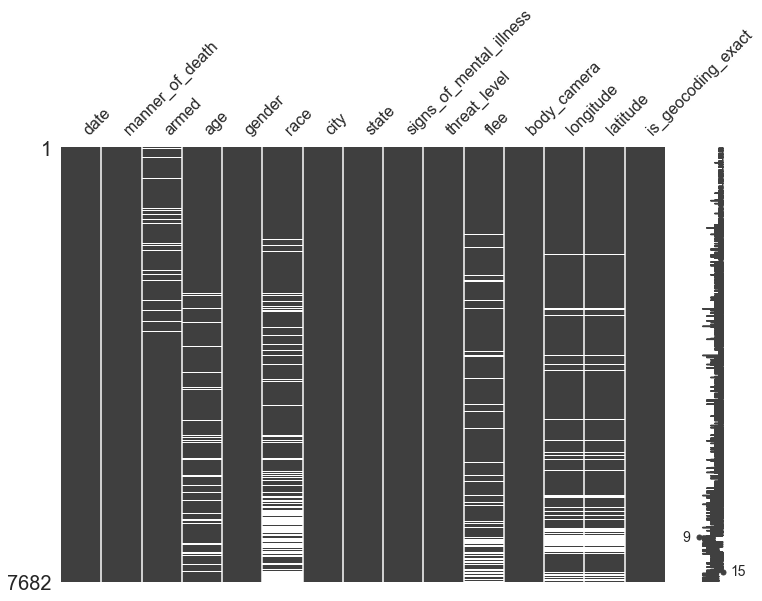

In [264]:
msno.matrix(df, figsize=(12,8))
plt.show()

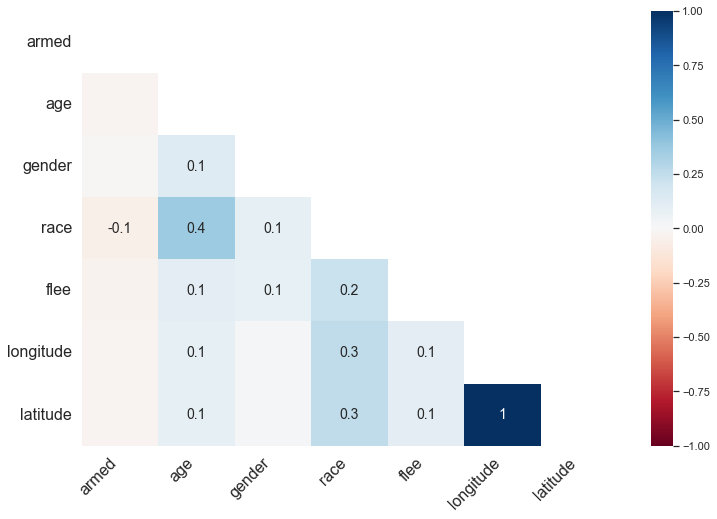

In [265]:
# check if missing data is correlated
msno.heatmap(df, figsize=(12,8))
plt.show()

In [266]:
df['flee'].value_counts()/len(df['flee'])

Not fleeing    0.561052
Car            0.161937
Foot           0.127441
Other          0.037230
Name: flee, dtype: float64

In [267]:
df['gender'].value_counts()/len(df['gender'])

M    0.952486
F    0.045040
Name: gender, dtype: float64

In [268]:
df['race'].value_counts()/len(df['race'])

W    0.414345
B    0.218433
H    0.146707
A    0.014580
N    0.012627
O    0.006118
Name: race, dtype: float64

In [269]:
df[df['age'].isna()]

date manner_of_death           armed  age gender race  \
127   2015-02-20            shot             gun  NaN      M    H   
769   2015-10-12            shot             gun  NaN      M    B   
809   2015-10-24            shot             gun  NaN      M  NaN   
819   2015-10-29            shot             gun  NaN      M    B   
932   2015-12-10            shot             gun  NaN      M  NaN   
...          ...             ...             ...  ...    ...  ...   
7669  2022-08-20            shot    undetermined  NaN      M  NaN   
7675  2022-08-22            shot           knife  NaN      M  NaN   
7677  2022-08-23            shot  unknown weapon  NaN      M  NaN   
7680  2022-08-23            shot             gun  NaN      M  NaN   
7681  2022-08-23            shot    undetermined  NaN      M    B   

               city state  signs_of_mental_illness  threat_level         flee  \
127         Houston    TX                    False        attack          Car   
769          Lawton    OK                    False        attack  Not fleeing   
809       New Paltz    NY                    False        attack  Not fleeing   
819        Columbus    OH                    False         other  Not fleeing   
932           Hemet    CA                    False        attack  Not fleeing   
...             ...   ...                      ...           ...          ...   
7669         Tucson    AZ                    False  undetermined          NaN   
7675         Sparks    NV                    False  undetermined          NaN   
7677  Harris County    TX                    False         other         Foot   
7680   Blue Springs    MO                    False        attack         Foot   
7681      Splendora    TX                    False  undetermined          Car   

      body_camera  longitude  latitude  is_geocoding_exact  
127         False    -95.401    29.983                True  
769         False    -98.422    34.599                True  
809         False    -74.080    41.747                True  
819         False    -82.863    39.922                True  
932         False   -116.971    33.729                True  
...           ...        ...       ...                 ...  
7669        False   -110.981    32.178                True  
7675        False   -119.763    39.544                True  
7677        False    -95.479    29.963                True  
7680        False    -94.258    39.023                True  
7681        False    -95.166    30.229                True  

[472 rows x 15 columns]

In [270]:
# handle null values

# make null flee 'Not fleeing', as 
df['flee'] = df['flee'].fillna('unknown')

# impute most common gender 'M' for null -- only 4% of shooting are female
df['gender'] = df['gender'].fillna('M')

# impute 'None' for null race -- 'None' is unknown according to WaPo GitHub
# don't want to make assumptions on race to skew data unnecessarily
df['race'] = df['race'].fillna('None')

# make null age median age of that state
df['age'] = df.groupby('state')['age'].apply(lambda x: x.fillna(x.median()))
#df['age'] = df['age'].fillna('unknown')

# armed null now 'undetermined'
df['armed'] = df['armed'].fillna('unknown')

Only imputed gender and age data with values. Age was imputed using the median age of victims in that state. I chose not to drop null data entirely, but exclude from visualizations when necessary.

Null data is being called 'unknown', except with Race is is 'None'.

In [271]:
# correct data types
df['age'] = df['age'].astype(int)

In [272]:
# T/F values to 1/0
#vals = {True:1, False:0}
#df['body_camera'] = df['body_camera'].map(vals)
#df['signs_of_mental_illness'] = df['signs_of_mental_illness'].map(vals)

manner = {'shot':'shot', 'shot and Tasered':'tasered and shot'}
df['manner_of_death'] = df['manner_of_death'].map(manner)

In [273]:
# Race labels for visualization
race_dict = {'A':'Asian','B':'Black','H':'Hispanic','N':'Native','W':'White','O':'Other','None': 'None'}
df['race'] = df['race'].map(race_dict)

In [274]:
# testing best binning for visualization
# bin age
df['age_binned_11_18'] = pd.cut(x=df['age'], bins=[-np.inf, 18, 25, 30, 35, 40, 45, 50, 55, 60, 66, np.inf], labels=['Under 18','18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59', '60-65','Over 65'])

# bin age
df['age_binned_11_15'] = pd.cut(x=df['age'], bins=[-np.inf, 15, 20, 25, 30, 35, 40, 45, 50, 60, 71, np.inf], labels=['Under 15','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-59','60-70','Over 70'])

# bin age
df['age_binned_10'] = pd.cut(x=df['age'], bins=[-np.inf, 15, 20, 25, 30, 35, 40, 45, 55, 66, np.inf], labels=['Under 15','15-19','20-24','25-29','30-34','35-39','40-44','45-54','55-65','Over 65'])

# bin age
df['age_binned_7'] = pd.cut(x=df['age'], bins=[-np.inf, 18, 25, 35, 45, 55, 66, np.inf], labels=['Under 18','18-24','25-34','35-44','45-54', '55-65', 'Over 65'])

# bin age
df['age_binned_8'] = pd.cut(x=df['age'], bins=[-np.inf, 18, 25, 30, 35, 45, 55, 66, np.inf], labels=['Under 18','18-24','25-29','30-34','35-44', '45-54', '55-65', 'Over 65'])


In [275]:
# prob not best one
df['age_binned_6'] = pd.cut(x=df['age'], bins=[-np.inf, 18, 30, 45, 60, 76, np.inf], labels=['Under 18','18-29','30-44','45-59','60-75','Over 75'])


In [276]:
# organizing 'armed' feature by creating difference breakdowns from over 100 different categories

unarmed = ['unarmed', 'toy weapon']
d_unarmed = dict.fromkeys(unarmed, 'unarmed')

armed = ['gun', 'guns and explosives', 'gun and knife','gun and sword', 'gun and car', 'gun and machete', 'vehicle and gun',
         'gun and vehicle', 'nail gun', 'knife', 'shovel', 'vehicle','hammer', 'hatchet', 'sword', 'machete', 'box cutter',
         'metal object', 'screwdriver', 'lawn mower blade', 'flagpole', 'cordless drill', 'crossbow', 'BB gun', 'metal pole',
         'Taser', 'metal pipe', 'metal hand tool', 'blunt object', 'metal stick', 'sharp object', 'meat cleaver','carjack',
         'chain', "contractor's level", 'railroad spikes', 'stapler', 'beer bottle', 'unknown weapon', 'binoculars',
         'pellet gun', 'bean-bag gun', 'baseball bat and fireplace poker', 'straight edge razor', 'ax', 'brick',
         'baseball bat','hand torch', 'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe','flashlight', 'baton',
         'spear', 'chair', 'pitchfork', 'hatchet and gun', 'rock','piece of wood', 'pipe', 'glass shard', 'motorcycle',
         'pepper spray','metal rake', 'crowbar', 'oar', 'machete and gun', 'tire iron', 'air conditioner', 'pole and knife',
         'baseball bat and bottle', 'fireworks','pen', 'chainsaw','incendiary device', 'samurai sword', 'bow and arrow',
         'wrench', 'walking stick', 'barstool', 'grenade','BB gun and vehicle', 'wasp spray', 'air pistol', 'Airsoft pistol',
         'baseball bat and knife', 'vehicle and machete','ice pick','car, knife and mace', 'bottle', 'microphone',
         'knife and vehicle', 'machete and hammer', 'stake', 'incendiary weapon','ax and machete', 'unknown weapon',
         'pair of scissors','hammer and garden tool','flare gun']
d_armed = dict.fromkeys(armed, 'armed')

unk = ['unknown']
d_unk = dict.fromkeys(unk, 'unknown')

undetermined = ['claimed to be armed', 'undetermined']
d_und = dict.fromkeys(undetermined, 'undetermined')

armed_3 = {**d_unarmed, **d_armed, **d_und, **d_unk}

df['armed_3'] = df['armed'].map(armed_3)

In [277]:
# differentiate guns
unarmed = ['unarmed', 'toy weapon']
d_unarmed = dict.fromkeys(unarmed, 'unarmed')

armed_gun = ['gun', 'guns and explosives', 'gun and knife','gun and sword', 'gun and car', 'gun and machete', 'vehicle and gun',
         'gun and vehicle']
d_armed_gun = dict.fromkeys(armed_gun, 'gun')

armed_other = ['nail gun', 'knife', 'shovel', 'vehicle','hammer', 'hatchet', 'sword', 'machete', 'box cutter',
         'metal object', 'screwdriver', 'lawn mower blade', 'flagpole', 'cordless drill', 'crossbow', 'BB gun', 'metal pole',
         'Taser', 'metal pipe', 'metal hand tool', 'blunt object', 'metal stick', 'sharp object', 'meat cleaver','carjack',
         'chain', "contractor's level", 'railroad spikes', 'stapler', 'beer bottle', 'unknown weapon', 'binoculars',
         'pellet gun', 'bean-bag gun', 'baseball bat and fireplace poker', 'straight edge razor', 'ax', 'brick',
         'baseball bat','hand torch', 'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe','flashlight', 'baton',
         'spear', 'chair', 'pitchfork', 'hatchet and gun', 'rock','piece of wood', 'pipe', 'glass shard', 'motorcycle',
         'pepper spray','metal rake', 'crowbar', 'oar', 'machete and gun', 'tire iron', 'air conditioner', 'pole and knife',
         'baseball bat and bottle', 'fireworks','pen', 'chainsaw','incendiary device', 'samurai sword', 'bow and arrow',
         'wrench', 'walking stick', 'barstool', 'grenade','BB gun and vehicle', 'wasp spray', 'air pistol', 'Airsoft pistol',
         'baseball bat and knife', 'vehicle and machete','ice pick','car, knife and mace', 'bottle', 'microphone',
         'knife and vehicle', 'machete and hammer', 'stake', 'incendiary weapon','ax and machete', 'unknown weapon',
               'pair of scissors','hammer and garden tool','flare gun']
d_armed_other = dict.fromkeys(armed_other, 'other weapon')

unk = ['unknown']
d_unk = dict.fromkeys(unk, 'unknown')

undetermined = ['claimed to be armed', 'undetermined']
d_und = dict.fromkeys(undetermined, 'undetermined')

armed_4 = {**d_unarmed, **d_armed_gun, **d_armed_other, **d_und, **d_unk}

df['armed_4'] = df['armed'].map(armed_4)

In [278]:
# further stratified
unarmed = ['unarmed', 'toy weapon']
d_unarmed = dict.fromkeys(unarmed, 'unarmed')

gun = ['gun', 'guns and explosives', 'gun and knife','gun and sword', 'gun and car', 'gun and machete', 
           'vehicle and gun', 'gun and vehicle']
d_gun = dict.fromkeys(gun, 'gun')

knife = ['knife','hatchet','sword','machete','box cutter', 'lawn mower blade','sharp object', 'meat cleaver',
    'straight edge razor', 'ax', 'chain saw', 'garden tool', 'scissors', 'pick-axe','spear', 'pitchfork', 'hatchet and gun', 'machete and gun', 'pole and knife', 
    'chainsaw','samurai sword','baseball bat and knife', 'vehicle and machete', 'ice pick','car, knife and mace', 'knife and vehicle', 'machete and hammer',
    'ax and machete', 'pair of scissors']
d_knives = dict.fromkeys(knife, 'knife/cutting instrument')

# separated toy guns from airsoft, bb guns, and pellet guns
air_bb = ['BB gun', 'pellet gun', 'BB gun and vehicle', 'air pistol', 'Airsoft pistol']
d_air_bb = dict.fromkeys(air_bb, 'air/bb/pellet guns')

toy = ['toy weapon']
d_toy = dict.fromkeys(toy, 'toy weapon')

other = ['nail gun', 'shovel', 'vehicle','hammer', 'metal object', 'screwdriver', 'flagpole', 'cordless drill',
         'crossbow','metal pole','Taser', 'metal pipe', 'metal hand tool','blunt object', 'metal stick','carjack',
         'chain', "contractor's level", 'railroad spikes', 'stapler', 'beer bottle', 'unknown weapon','binoculars',
         'bean-bag gun', 'baseball bat and fireplace poker', 'brick', 'baseball bat','hand torch','pole', 'flashlight',
         'baton','chair','pitchfork', 'rock','piece of wood', 'pipe', 'glass shard', 'motorcycle', 'pepper spray',
         'metal rake', 'crowbar', 'oar', 'tire iron', 'air conditioner', 'baseball bat and bottle', 'fireworks',
         'pen','incendiary device', 'bow and arrow', 'wrench', 'walking stick','barstool', 'grenade', 'wasp spray',
         'bottle', 'microphone','stake', 'incendiary weapon','unknown weapon','hammer and garden tool', 'flare gun'] 
d_other = dict.fromkeys(other, 'other weapon')

unk = ['unknown']
d_unk = dict.fromkeys(unk, 'unknown')

undetermined: ['claimed to be armed', 'undetermined']
d_undet = dict.fromkeys(undetermined, 'undetermined')

armed_7 = {**d_unarmed, **d_gun, **d_knives, **d_air_bb, **d_toy, **d_other, **d_undet, **d_unk}

df['armed_7'] = df['armed'].map(armed_7)

'armed' is often updated with a specific weapon not otherwise in the list, causing null values in engineered columns.

'undetermined' includes 'undetermined' and 'claimed to be armed'

'armed_other' includes (explosives, fire, blunt objects, melee weapons, bean bag gun)

In [279]:
n = df[df['armed_3'].isna()]
n['armed'].unique()

array([], dtype=object)

*threat_level:* The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats.

*is_geocoding_exact:* False means centroid area [lat,long]; True means [lat,long] within approximately 100 meters

In [280]:
df['count'] = 1

In [281]:
# make MM-YY column from date
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
# make YY column from date
df['year'] = df['date'].dt.year
# make quarter column from date
df['quarter'] = df['date'].dt.quarter

In [282]:
# make separate df with latitude and longitude and remove from df
coord_df = df.copy()
df.drop(columns=['latitude','longitude'], inplace=True)
coord_df['latitude'] = coord_df['latitude'].astype(float)
coord_df['longitude'] = coord_df['longitude'].astype(float)

In [283]:
coord_df.isna().sum()

date                         0
manner_of_death              0
armed                        0
age                          0
gender                       0
race                         0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                         0
body_camera                  0
longitude                  835
latitude                   835
is_geocoding_exact           0
age_binned_11_18             0
age_binned_11_15             0
age_binned_10                0
age_binned_7                 0
age_binned_8                 0
age_binned_6                 0
armed_3                      0
armed_4                      0
armed_7                      0
count                        0
month                        0
year                         0
quarter                      0
dtype: int64

In [284]:
df.isna().sum()

date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
is_geocoding_exact         0
age_binned_11_18           0
age_binned_11_15           0
age_binned_10              0
age_binned_7               0
age_binned_8               0
age_binned_6               0
armed_3                    0
armed_4                    0
armed_7                    0
count                      0
month                      0
year                       0
quarter                    0
dtype: int64

In [285]:
df.columns

Index(['date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city',
       'state', 'signs_of_mental_illness', 'threat_level', 'flee',
       'body_camera', 'is_geocoding_exact', 'age_binned_11_18',
       'age_binned_11_15', 'age_binned_10', 'age_binned_7', 'age_binned_8',
       'age_binned_6', 'armed_3', 'armed_4', 'armed_7', 'count', 'month',
       'year', 'quarter'],
      dtype='object')

# adding census data

In [286]:
state_pop19 = pd.read_csv('../Fatal-Police-Shootings-WaPo/data/statepop/nst-est2019-popchg2010_2019.csv')

In [287]:
# create state population dataframe
state_pop = pd.DataFrame(columns=['state_name', 'PopEstimate2015', 'PopEstimate2016', 'PopEstimate2017', 'PopEstimate2018', 'PopEstimate2019'])
state_pop[['state_name', 'PopEstimate2015', 'PopEstimate2016', 'PopEstimate2017', 'PopEstimate2018', 'PopEstimate2019']] = state_pop19[['NAME','POPESTIMATE2015', 'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018', 'POPESTIMATE2019']]
# drop regions and PR
state_pop.drop(axis=0, index=[1,2,3,4,56], inplace=True)
state_pop.reset_index(drop=True,inplace=True)

In [288]:
state_pop20_21 = pd.read_csv('../Fatal-Police-Shootings-WaPo/data/statepop/NST-EST2021-popchg2020_2021.csv')

In [289]:
state_pop20_21.drop(axis=0, index=[1,2,3,4,56], inplace=True)
state_pop20_21.reset_index(drop=True, inplace=True)

state_pop[['PopEstimate2020', 'PopEstimate2021']] = state_pop20_21[['POPESTIMATE2020', 'POPESTIMATE2021']]

In [290]:
state_abbrev = {'United States':'Total', 'Alabama':'AL', 'Alaska':'AK', 'Arizona':'AZ', 'Arkansas':'AR', 
                'California':'CA','Colorado':'CO', 'Connecticut':'CT', 'Delaware':'DE','District of Columbia':'DC',
                'Florida':'FL', 'Georgia':'GA', 'Hawaii':'HI', 'Idaho':'ID', 'Illinois': 'IL','Indiana': 'IN',
                'Iowa':'IA', 'Kansas':'KS', 'Kentucky':'KY', 'Louisiana':'LA', 'Maine':'ME', 'Maryland':'MD', 
                'Massachusetts':'MA', 'Michigan':'MI', 'Minnesota':'MN', 'Mississippi':'MS', 'Missouri': 'MO',
                'Montana': 'MT', 'Nebraska':'NE', 'Nevada':'NV', 'New Hampshire':'NH','New Jersey':'NJ', 'New Mexico':'NM',
                'New York':'NY', 'North Carolina':'NC', 'North Dakota':'ND','Ohio':'OH','Oklahoma':'OK', 'Oregon':'OR',
                'Pennsylvania':'PA', 'Rhode Island':'RI', 'South Carolina':'SC','South Dakota':'SD','Tennessee':'TN',
                'Texas':'TX', 'Utah':'UT','Vermont':'VT','Virginia':'VA','Washington':'WA', 'West Virginia':'WV',
                'Wisconsin':'WI', 'Wyoming':'WY'}

state_pop['state'] = state_pop['state_name'].map(state_abbrev)

In [291]:
state_pop.set_index(keys='state', inplace=True)

In [292]:
# merge state pop data
df = pd.merge(df, state_pop, on='state')
coord_df = pd.merge(coord_df, state_pop, on='state')

intial findings

# Exploratory data analysis

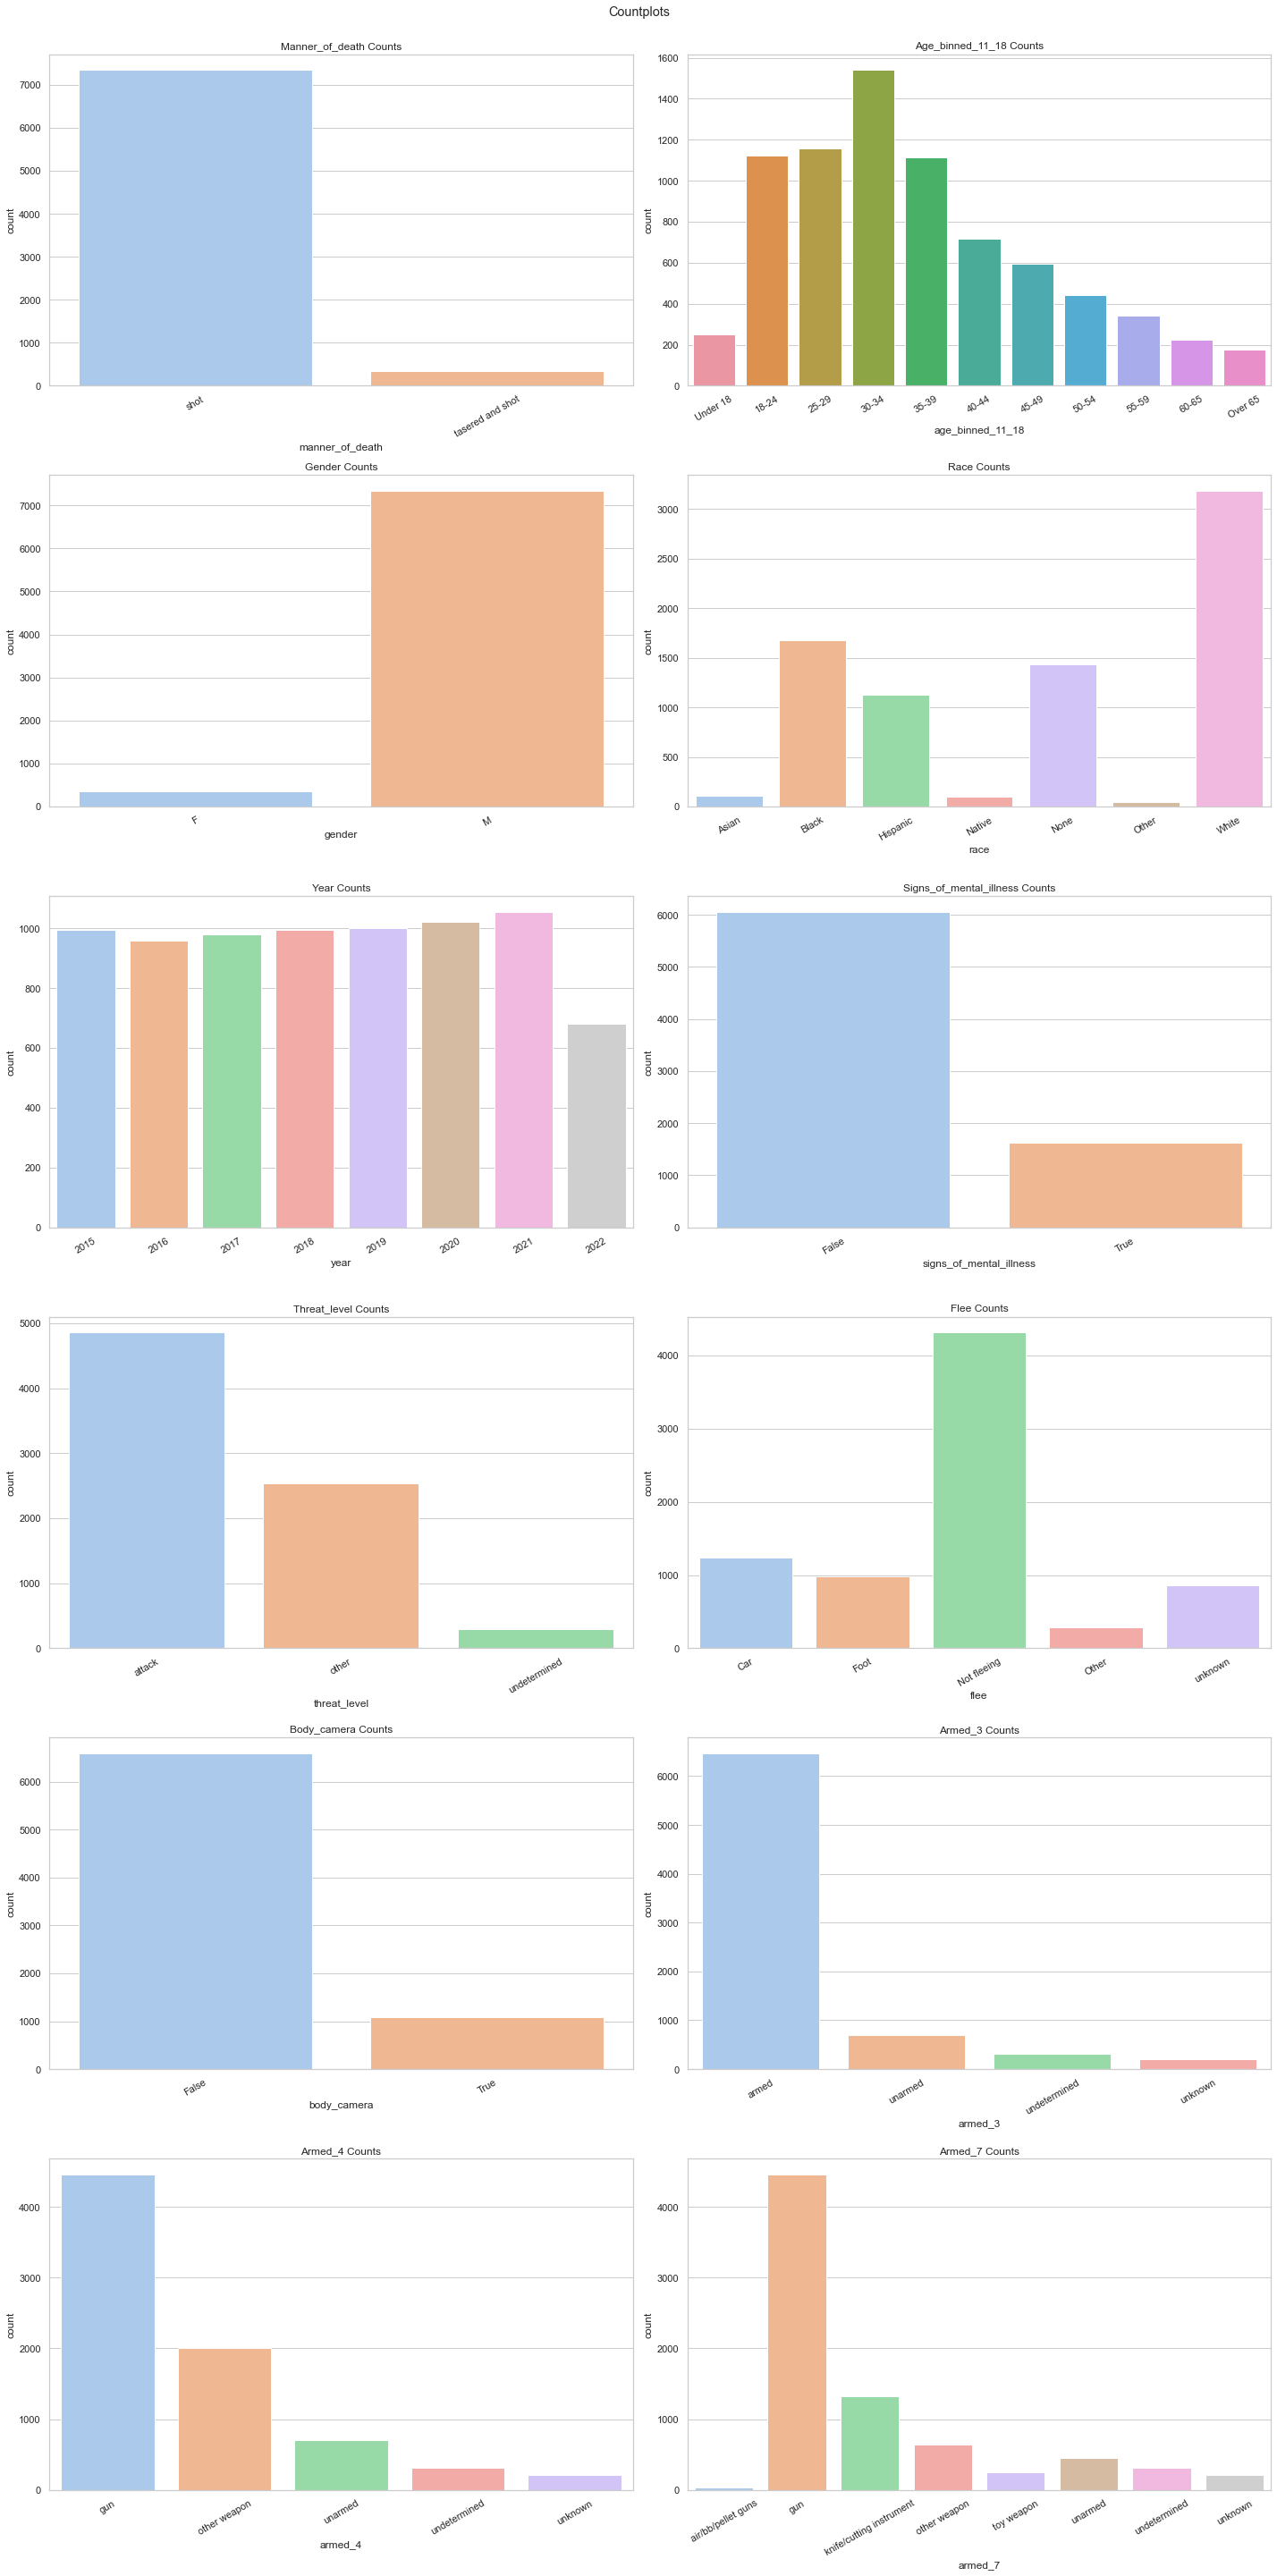

In [296]:
# plot distributions
columns = [['manner_of_death', 'age_binned_11_18'], ['gender', 'race'],['year', 'signs_of_mental_illness'],
           ['threat_level','flee'], ['body_camera', 'armed_3'], ['armed_4', 'armed_7']]

def countplots(cols):
    fig, axes = plt.subplots(6, 2, figsize=(20, 40), squeeze=True)
    fig.suptitle('Countplots',y=1)
    for row in range(6):
        for col in range(2):
            column = cols[row][col]
            p = sns.countplot(x=df[column],ax=axes[row,col], order=df.sort_values(by=column)[column].unique())
            p.set_xticks(range(len(df[column].unique())))
            p.set_xticklabels(labels=df.sort_values(by=column)[column].unique(), rotation=30)
            axes[row,col].set_title(f'{column.capitalize()} Counts')
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.tight_layout()
    plt.show()
    
countplots(columns)

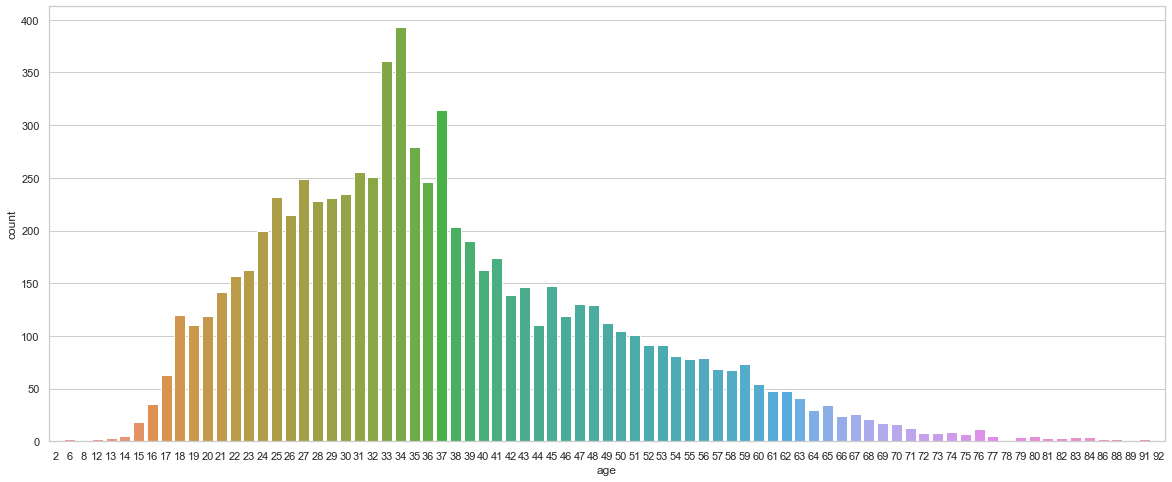

In [297]:
fig, ax = plt.subplots(figsize = (20,8))
sns.countplot(x='age', data=df)
plt.show()

In [302]:
# 30-44 year olds are the largest age group represented with 43.9% of deaths, followed by 18-29 year olds with 29.7%
df['age_binned_6'].value_counts()/len(df['age_binned_6'])

30-44       0.438948
18-29       0.296928
45-59       0.179641
60-75       0.047123
Under 18    0.032544
Over 75     0.004816
Name: age_binned_6, dtype: float64

In [303]:
# 
df['age_binned_11_18'].value_counts()/len(df['age_binned_11_18'])

30-34       0.200469
25-29       0.150742
18-24       0.146186
35-39       0.145275
40-44       0.093205
45-49       0.077454
50-54       0.057537
55-59       0.044650
Under 18    0.032544
60-65       0.029289
Over 65     0.022650
Name: age_binned_11_18, dtype: float64

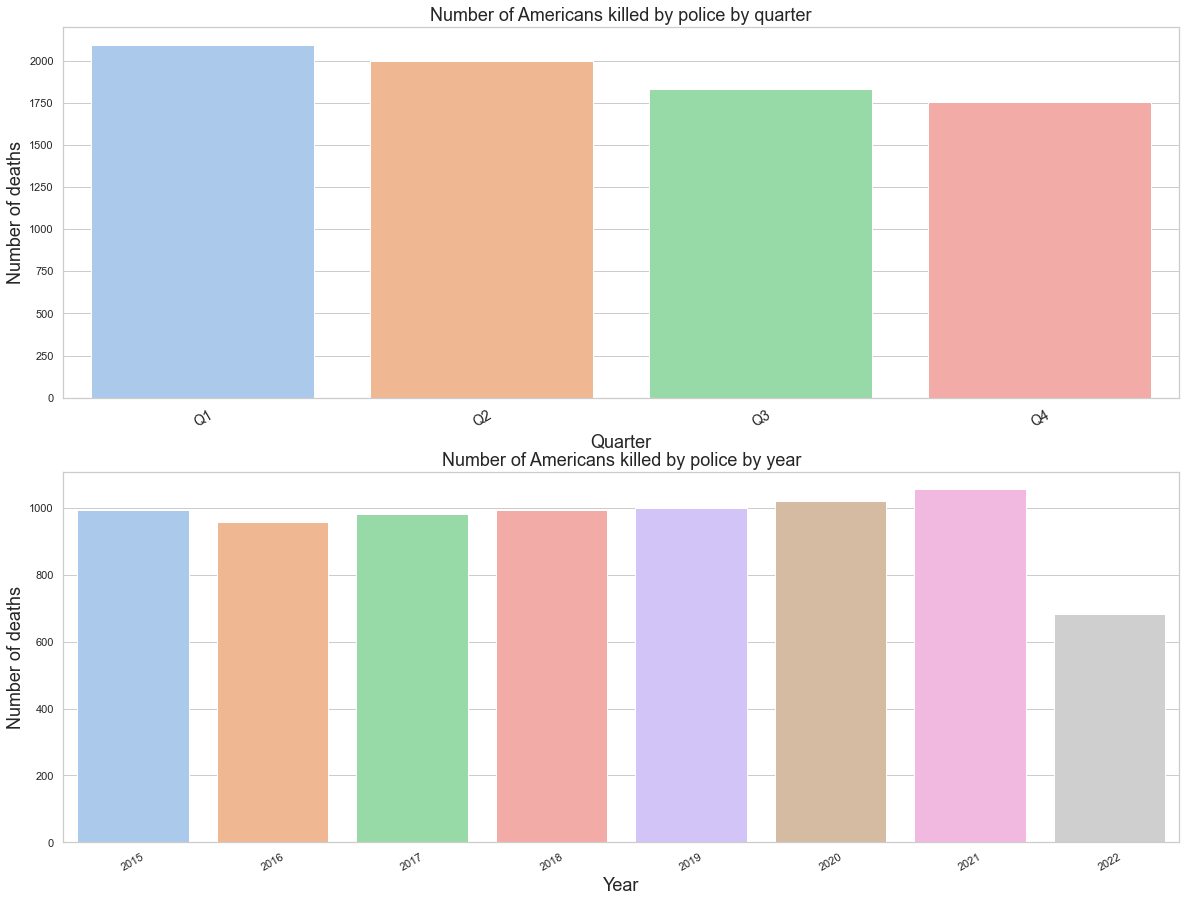

In [304]:
fig, ax = plt.subplots(2,1, figsize=(20,15))

#state_dist = sns.countplot(x = df.sort_values(by='state')['state'], ax=ax[0])
#state_dist.set_xticklabels(labels=df.sort_values(by='state')['state'].unique(), rotation=30)
#state_dist.set_title('Police shooting deaths by state', fontsize=18)
#state_dist.set_xlabel('State', fontsize=18)
#state_dist.set_ylabel('Number of deaths', fontsize=18)

quarter_dist = sns.countplot(x = df.sort_values(by='quarter')['quarter'], data=df,ax=ax[0])
quarter_dist.set_xticklabels(labels=df.sort_values(by='quarter')['quarter'].unique(), rotation=30)
quarter_dist.set_title('Number of Americans killed by police by quarter', fontsize=18)
quarter_dist.set_xlabel('Quarter', fontsize=18)
quarter_dist.set_xticks(ticks=[0,1,2,3],labels=['Q1','Q2','Q3','Q4'], fontsize=14)
quarter_dist.set_ylabel('Number of deaths', fontsize=18)

year_dist = sns.countplot(x = df.sort_values(by='year')['year'], data=df,ax=ax[1])
year_dist.set_xticklabels(labels=df.sort_values(by='year')['year'].unique(), rotation=30)
year_dist.set_title('Number of Americans killed by police by year', fontsize=18)
year_dist.set_xlabel('Year', fontsize=18)
year_dist.set_ylabel('Number of deaths', fontsize=18)

plt.show()

In [305]:
months = df.month.value_counts()

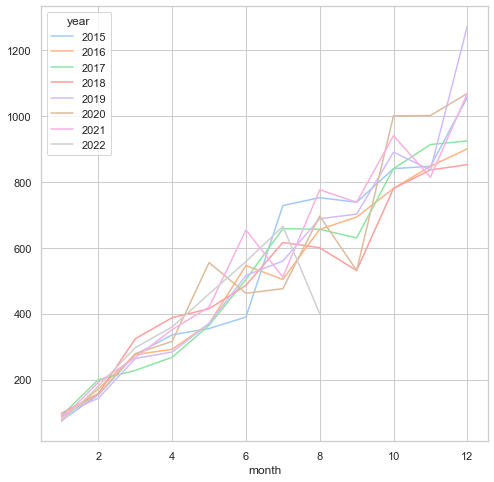

In [306]:
# pivot table summing is off
df.pivot_table(index='month', columns='year', values='count', aggfunc={'month':'sum'}).plot(figsize=(8,8))                                                                             
plt.show()

In [307]:
d = df.groupby([df.month, df.year])['count'].sum()

In [308]:
d = d.unstack().cumsum()

In [309]:
d

year    2015   2016   2017   2018   2019    2020    2021   2022
month                                                          
1       76.0   81.0   91.0   98.0   93.0    88.0    80.0   73.0
2      153.0  167.0  191.0  177.0  165.0   166.0   176.0  163.0
3      245.0  259.0  267.0  285.0  253.0   259.0   265.0  262.0
4      329.0  332.0  334.0  382.0  324.0   338.0   353.0  352.0
5      400.0  406.0  407.0  465.0  398.0   449.0   437.0  444.0
6      465.0  497.0  491.0  546.0  484.0   526.0   546.0  537.0
7      569.0  569.0  585.0  634.0  564.0   594.0   619.0  632.0
8      663.0  651.0  667.0  709.0  650.0   681.0   716.0  682.0
9      745.0  728.0  737.0  768.0  728.0   740.0   798.0    NaN
10     829.0  806.0  821.0  846.0  817.0   840.0   892.0    NaN
11     906.0  883.0  904.0  922.0  893.0   931.0   966.0    NaN
12     994.0  958.0  981.0  993.0  999.0  1020.0  1055.0    NaN

In [310]:
# cumulative sum is off in this table

#pivoted = df.pivot_table(index='month', columns='year', values='count', aggfunc={'month':'sum'})#.plot(figsize=(15,10))                                                                             
#plt.legend(loc='lower right')
#plt.show()
# count or sum for aggfunc
#pivoted

In [311]:
pivoted = df.pivot_table(index='month', columns='year', values='count', aggfunc={'count':'sum'})#.plot(figsize=(15,10))                                                                             
#plt.legend(loc='lower right')
#plt.show()
# count or sum for aggfunc
pivoted

year    2015  2016   2017   2018   2019   2020   2021  2022
month                                                      
1       76.0  81.0   91.0   98.0   93.0   88.0   80.0  73.0
2       77.0  86.0  100.0   79.0   72.0   78.0   96.0  90.0
3       92.0  92.0   76.0  108.0   88.0   93.0   89.0  99.0
4       84.0  73.0   67.0   97.0   71.0   79.0   88.0  90.0
5       71.0  74.0   73.0   83.0   74.0  111.0   84.0  92.0
6       65.0  91.0   84.0   81.0   86.0   77.0  109.0  93.0
7      104.0  72.0   94.0   88.0   80.0   68.0   73.0  95.0
8       94.0  82.0   82.0   75.0   86.0   87.0   97.0  50.0
9       82.0  77.0   70.0   59.0   78.0   59.0   82.0   NaN
10      84.0  78.0   84.0   78.0   89.0  100.0   94.0   NaN
11      77.0  77.0   83.0   76.0   76.0   91.0   74.0   NaN
12      88.0  75.0   77.0   71.0  106.0   89.0   89.0   NaN

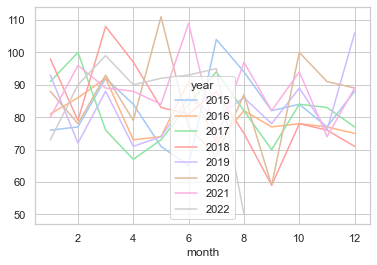

In [312]:
pivoted.plot()
plt.show()

In [313]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=d.index, y=d[2015],
                    mode='lines+markers',
                    name='2015', line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=d.index, y=d[2016], name = '2016',
                         line=dict(color='orangered', width=4)))
fig.add_trace(go.Scatter(x=d.index, y=d[2017], name = '2017',
                         line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x=d.index, y=d[2018], name = '2018',
                         line=dict(color='lightseagreen', width=4)))
fig.add_trace(go.Scatter(x=d.index, y=d[2019], name = '2019',
                         line=dict(color='powderblue', width=4)))
fig.add_trace(go.Scatter(x=d.index, y=d[2020], name = '2020',
                         line=dict(color='purple', width=4)))
fig.add_trace(go.Scatter(x=d.index, y=d[2021], name = '2021',
                         line=dict(color='gray', width=4)))
fig.add_trace(go.Scatter(x=d.index, y=d[2022], name = '2022',
                         line=dict(color='mediumorchid', width=4)))

fig.update_layout(title={'text': 'Fatal Police Shootings by Year', 'xanchor': 'center', 'yanchor': 'top','y':0.9,
                         'x':0.45}, xaxis_title="Month", yaxis_title="Number of People Killed",
                  legend_title={'text': 'Year'}, font=dict(family="Courier New, monospace", size=16, color="RebeccaPurple"))

fig.show()

more exploratory 

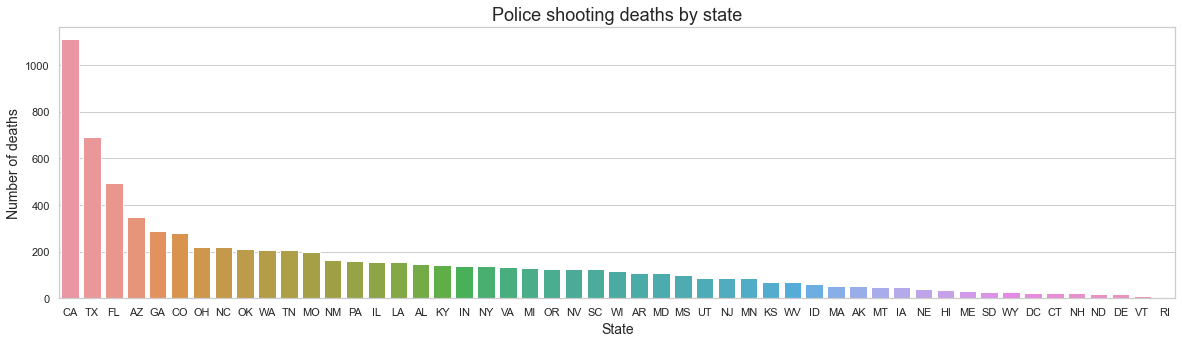

In [314]:
shot_by_state = df.state.value_counts()

plt.figure(figsize=(20, 5))
plt.title('Police shooting deaths by state', fontsize=18)
sns.barplot(shot_by_state.index, shot_by_state)
plt.ylabel('Number of deaths', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.show()

In [315]:
# plot total killings (2015-2022) by state per 100,000 people of that state (using 2020 population)
state_pop_2020 = state_pop['PopEstimate2020'].drop('Total').sort_index(ascending=True)
shot_by_state = df.state.value_counts().sort_index(ascending=True)

In [316]:
adj_shot_by_state = round(shot_by_state/(state_pop_2020/100000), 2).sort_values(ascending=False)
adj_shot_by_state.head(5)

NM    7.79
AK    7.10
OK    5.33
AZ    4.86
CO    4.81
dtype: float64

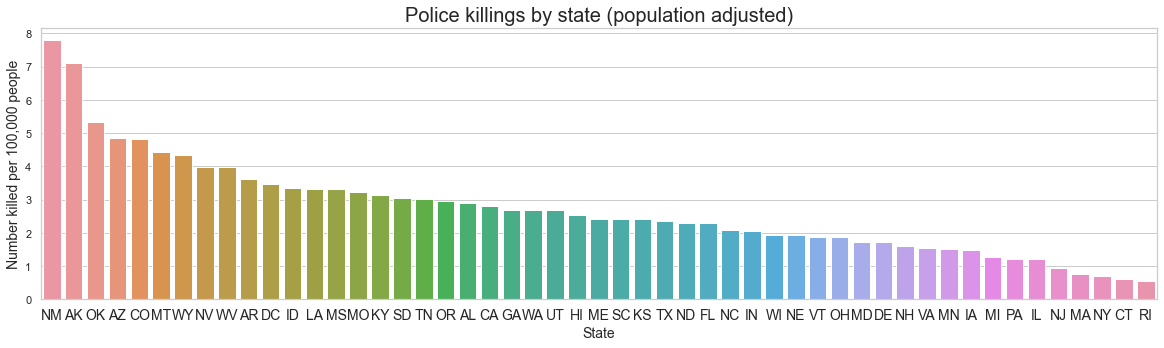

In [317]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(adj_shot_by_state.index, adj_shot_by_state, ax=ax)
plt.title('Police killings by state (population adjusted)', fontsize=20)
plt.xlabel('State', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Number killed per 100,000 people', fontsize=14)
plt.show()

In [318]:
# very different from states with actual highest number of killings (higher population states)

In [319]:
shot_by_city = df.city.value_counts()
shot_by_city_top20 = shot_by_city.head(20)

In [320]:
len(df['city'])

7682

In [321]:
len(shot_by_city)

3143

In [322]:
df[df.city.duplicated()]

date manner_of_death         armed  age gender    race        city  \
9    2015-08-05            shot           gun   40      M   White      Tacoma   
14   2015-12-06            shot           gun   35      M   White     Seattle   
19   2016-01-28            shot       vehicle   32      F  Native      Tacoma   
20   2016-02-20            shot           gun   41      M   Black    Lakewood   
21   2016-02-21            shot  undetermined   46      M   Black     Seattle   
...         ...             ...           ...  ...    ...     ...         ...   
7671 2019-08-09            shot    toy weapon   62      M   White  Montpelier   
7673 2021-08-05            shot       unarmed   35      M    None    Hartford   
7674 2021-08-25            shot  undetermined   33      M    None     Rutland   
7679 2018-09-07            shot           gun   28      M   Black   Pawtucket   
7680 2021-11-22            shot           gun   32      M    None     Warwick   

     state  signs_of_mental_illness threat_level  ...  year  quarter  \
9       WA                    False       attack  ...  2015        3   
14      WA                    False       attack  ...  2015        4   
19      WA                    False        other  ...  2016        1   
20      WA                    False       attack  ...  2016        1   
21      WA                    False        other  ...  2016        1   
...    ...                      ...          ...  ...   ...      ...   
7671    VT                     True       attack  ...  2019        3   
7673    VT                    False       attack  ...  2021        3   
7674    VT                    False        other  ...  2021        3   
7679    RI                    False       attack  ...  2018        3   
7680    RI                     True       attack  ...  2021        4   

        state_name PopEstimate2015 PopEstimate2016 PopEstimate2017  \
9       Washington         7163657         7294771         7423362   
14      Washington         7163657         7294771         7423362   
19      Washington         7163657         7294771         7423362   
20      Washington         7163657         7294771         7423362   
21      Washington         7163657         7294771         7423362   
...            ...             ...             ...             ...   
7671       Vermont          625216          623657          624344   
7673       Vermont          625216          623657          624344   
7674       Vermont          625216          623657          624344   
7679  Rhode Island         1056065         1056770         1055673   
7680  Rhode Island         1056065         1056770         1055673   

     PopEstimate2018 PopEstimate2019 PopEstimate2020 PopEstimate2021  
9            7523869         7614893         7718785         7738692  
14           7523869         7614893         7718785         7738692  
19           7523869         7614893         7718785         7738692  
20           7523869         7614893         7718785         7738692  
21           7523869         7614893         7718785         7738692  
...              ...             ...             ...             ...  
7671          624358          623989          642495          645570  
7673          624358          623989          642495          645570  
7674          624358          623989          642495          645570  
7679         1058287         1059361         1096229         1095610  
7680         1058287         1059361         1096229         1095610  

[4539 rows x 34 columns]

In [323]:
df.city.nunique()

3143

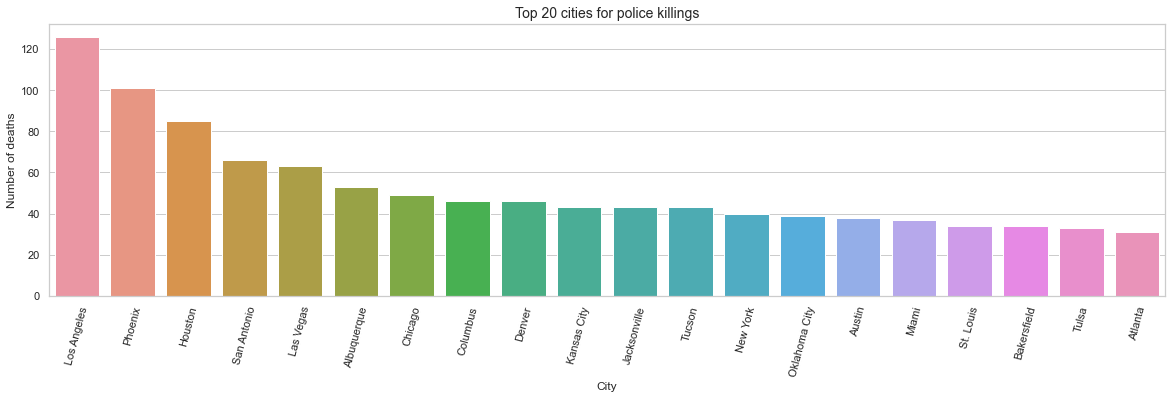

In [324]:
plt.figure(figsize=(20, 5))
plt.title('Top 20 cities for police killings', fontsize=14)
plt.xticks(rotation=75)
sns.barplot(shot_by_city_top20.index, shot_by_city_top20)
plt.ylabel('Number of deaths', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.show()

In [325]:
k = df.groupby([df.state, df.city])['count'].sum().sort_values(ascending=False)
k.head()

state  city       
CA     Los Angeles    126
AZ     Phoenix        100
TX     Houston         84
       San Antonio     66
NV     Las Vegas       62
Name: count, dtype: int64

In [326]:
ks = k.unstack(level=-1,fill_value=0)

In [327]:
ks.index

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='state')

In [328]:
ks.head(20)

city   300 block of State Line Road  Abbeville  Aberdeen  Abilene  Abingdon  \
state                                                                         
AK                                0          0         0        0         0   
AL                                0          1         0        0         0   
AR                                0          0         0        0         0   
AZ                                0          0         0        0         0   
CA                                0          0         0        0         0   
CO                                0          0         0        0         0   
CT                                0          0         0        0         0   
DC                                0          0         0        0         0   
DE                                0          0         0        0         0   
FL                                0          0         0        0         0   
GA                                0          0         0        0         0   
HI                                0          0         0        0         0   
IA                                0          0         0        0         0   
ID                                0          0         0        0         0   
IL                                0          0         0        0         0   
IN                                0          0         0        0         0   
KS                                0          0         0        0         0   
KY                                0          0         0        0         0   
LA                                0          1         0        0         0   
MA                                0          0         0        0         0   

city   Abington Township  Acworth  Ada  Adams County  Addison  ...  Yorkville  \
state                                                          ...              
AK                     0        0    0             0        0  ...          0   
AL                     0        0    0             0        0  ...          0   
AR                     0        0    0             0        0  ...          0   
AZ                     0        0    0             0        0  ...          0   
CA                     0        0    0             0        0  ...          0   
CO                     0        0    0             6        0  ...          0   
CT                     0        0    0             0        0  ...          0   
DC                     0        0    0             0        0  ...          0   
DE                     0        0    0             0        0  ...          0   
FL                     0        0    0             0        0  ...          0   
GA                     0        3    0             0        0  ...          0   
HI                     0        0    0             0        0  ...          0   
IA                     0        0    0             0        0  ...          0   
ID                     0        0    0             0        0  ...          0   
IL                     0        0    0             0        0  ...          1   
IN                     0        0    0             0        0  ...          0   
KS                     0        0    0             0        0  ...          0   
KY                     0        0    0             0        0  ...          0   
LA                     0        0    0             0        0  ...          0   
MA                     0        0    0             0        0  ...          0   

city   Youngstown  Youngtown  Yreka  Yuba City  Yucca Valley  Yulee  Yuma  \
state                                                                       
AK              0          0      0          0             0      0     0   
AL              0          0      0          0             0      0     0   
AR              0          0      0          0             0      0     0   
AZ              0          1      0          0             0      0     5   
CA              

In [329]:
coord_df['city/state'] = coord_df['city'] + ', ' + coord_df['state']
df['city/state'] = df['city'] + ', ' + df['state']

In [330]:
df['city/state'].value_counts()

Los Angeles, CA    126
Phoenix, AZ        100
Houston, TX         84
San Antonio, TX     66
Las Vegas, NV       62
                  ... 
Mena, AR             1
Sims, AR             1
Farmington, AR       1
Dover, AR            1
Woonsocket, RI       1
Name: city/state, Length: 3616, dtype: int64

In [331]:
#top20_cams.groupby(['city','year'])
top20_cams_by_year = df.groupby([df.city, df.year])['count','body_camera'].sum().sort_values(by='count', ascending=False)
cams_by_city = df.groupby([df.city])['count','body_camera'].sum().sort_values(by='count', ascending=False)

In [332]:
top20_cams = cams_by_city[:20]

In [333]:
top20_cams

count  body_camera
city                             
Los Angeles      126           25
Phoenix          101           15
Houston           85           20
San Antonio       66           11
Las Vegas         63           29
Albuquerque       53           10
Chicago           49           12
Denver            46            2
Columbus          46            7
Kansas City       43            4
Tucson            43            6
Jacksonville      43            9
New York          40            9
Oklahoma City     39           15
Austin            38            9
Miami             37            2
St. Louis         34            0
Bakersfield       34           10
Tulsa             33            4
Atlanta           31            3

In [334]:
top20_cams['no_body_camera'] = top20_cams['count'] - top20_cams['body_camera']

/var/folders/v_/wdytmqyx1377p1m8yrz0tdrr0000gn/T/ipykernel_22089/1872087179.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [335]:
len(top20_cams['body_camera'])

20

In [336]:
len(top20_cams)

20

In [337]:
top20_cam = top20_cams.groupby(['city', 'no_body_camera', 'body_camera']).size().reset_index()

In [338]:
top20_cams

count  body_camera  no_body_camera
city                                             
Los Angeles      126           25             101
Phoenix          101           15              86
Houston           85           20              65
San Antonio       66           11              55
Las Vegas         63           29              34
Albuquerque       53           10              43
Chicago           49           12              37
Denver            46            2              44
Columbus          46            7              39
Kansas City       43            4              39
Tucson            43            6              37
Jacksonville      43            9              34
New York          40            9              31
Oklahoma City     39           15              24
Austin            38            9              29
Miami             37            2              35
St. Louis         34            0              34
Bakersfield       34           10              24
Tulsa             33            4              29
Atlanta           31            3              28

In [339]:
#top20_cams['percent'] = top20_cams['body_camera'] / top20_cams['count']
#top20_cam['percent'] = top20_cams.groupby(['no_body_camera', 'body_camera']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
#text = top20_cams['percent'].apply(lambda x: '{0:1.2f}%'.format(x))
#top20_cams['percent_no'] = top20_cams['no_body_camera'] / top20_cams['count']


In [340]:
top20_cams

count  body_camera  no_body_camera
city                                             
Los Angeles      126           25             101
Phoenix          101           15              86
Houston           85           20              65
San Antonio       66           11              55
Las Vegas         63           29              34
Albuquerque       53           10              43
Chicago           49           12              37
Denver            46            2              44
Columbus          46            7              39
Kansas City       43            4              39
Tucson            43            6              37
Jacksonville      43            9              34
New York          40            9              31
Oklahoma City     39           15              24
Austin            38            9              29
Miami             37            2              35
St. Louis         34            0              34
Bakersfield       34           10              24
Tulsa             33            4              29
Atlanta           31            3              28

In [341]:
# rates of body cam usage in top 20 cities
# stacked bar plot
fig = px.histogram(top20_cams, x=top20_cams.index, y=['no_body_camera','body_camera'],
             title='Body Camera Usage in Top 20 Cities for Police Killings', barnorm='percent', text_auto='.1f')
fig.update_layout(xaxis={'categoryorder':'total descending'}, yaxis={"ticksuffix":"%"})
fig.show()

In [342]:
# rates of body cam usage in top 20 cities
# stacked bar plot
fig = px.histogram(top20_cams, x=top20_cams.index, y=['no_body_camera','body_camera'],
             title='Body Camera Usage in Top 20 Cities for Police Killings')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [343]:
cities = list(top20_cams.index)
top20_race = df.loc[df['city'].isin(cities)]

In [344]:
# rates of body cam usage in top 20 cities
# stacked bar plot
fig = px.histogram(top20_race, x='body_camera', y='count', color='race', title='Race Breakdown of Body Camera Usage - Top 20 Cities',
                   category_orders={'race':['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other', 'None']},
                   barnorm='percent', text_auto='.1f')
fig.update_layout(xaxis={'categoryorder':'total descending'}, yaxis={"ticksuffix":"%"})
fig.show()

In [345]:
# rates of body cam usage in top 20 cities
# stacked bar plot
fig = px.histogram(df, x='body_camera', y='count', color='race', title='Race Breakdown of Body Camera Usage',
                   category_orders={'race':['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other', 'None']},
                   barnorm='percent', text_auto='.1f')
fig.update_layout(xaxis={'categoryorder':'total descending'}, yaxis={"ticksuffix":"%"})
fig.show()

In [346]:
# with a body camera present or not, Black people are killed by police at a higher rate than the proportion of 
# the total population they compose.

In [347]:
# rates of body cam usage in top 20 cities
# stacked bar plot
fig = px.histogram(top20_race, x='city', y='count', color='race', title='Police Killings by Race - Top 20 Cities',
                  barnorm='percent', text_auto='.1f', category_orders={'race':['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other', 'None']})
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide', xaxis={'categoryorder':'total descending'},
                  xaxis_title='City', yaxis_title='Percent of Total', yaxis={"ticksuffix":"%"}, legend_title='Race')
fig.show()

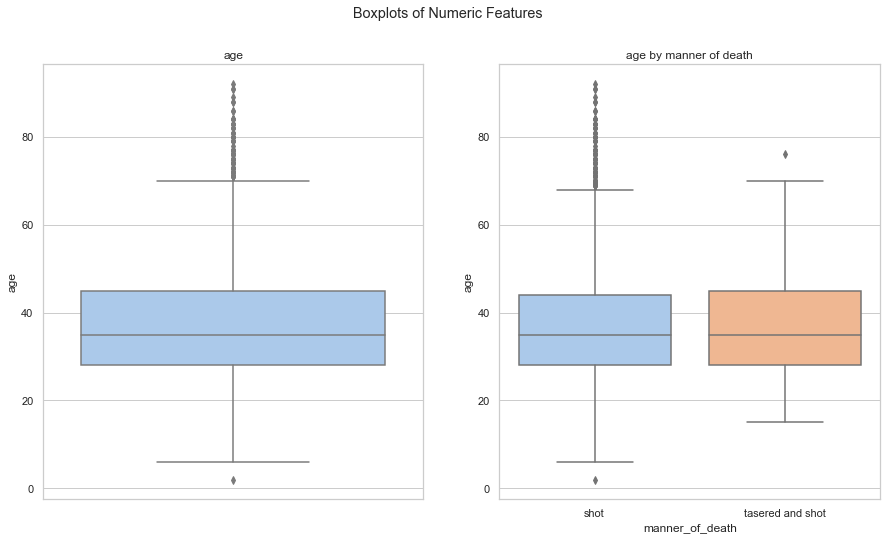

In [348]:
# box plots of Age
fig, ax = plt.subplots(1,2, figsize=(15,8))
plt.suptitle('Boxplots of Numeric Features')
sns.boxplot(y='age', data=df, ax=ax[0])
ax[0].set_title('age')

sns.boxplot(y='age',x='manner_of_death', data=df, ax=ax[1])
ax[1].set_title('age by manner of death')
plt.show()

In [349]:
# the police don't appear to utilize tasers in their very youngest and oldest encounters that result in shooting death

In [350]:
shot_by_race = df['race'].value_counts()

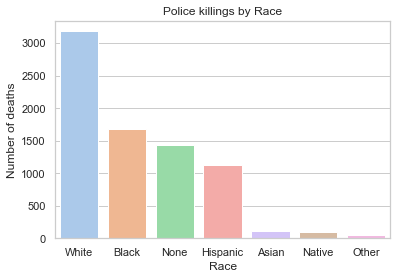

In [351]:
plt.title("Police killings by Race")
sns.barplot(shot_by_race.index, shot_by_race)
plt.ylabel('Number of deaths')
plt.xlabel('Race')
plt.show()

In [352]:
# most people killed are white
# 18.5% of shootings don't have race reported

In [353]:
# according to Census Bureau Quick Fact Sheet https://www.census.gov/quickfacts/fact/table/US/PST045221
# -- White: 75.8%, White not hispanic: 59.3%, Black: 13.6%, Asian alone: 6.1%, Hispanic/Latino: 18.9%, 
# Native American: 1.3%, Hawaiian Pacific Islander: 0.3%

race_prop = shot_by_race/len(df)
race_prop

White       0.414345
Black       0.218433
None        0.187191
Hispanic    0.146707
Asian       0.014580
Native      0.012627
Other       0.006118
Name: race, dtype: float64

In [354]:
# account for population race proportions
race = {'White':'W','Black':'B', 'Asian':'A','Hispanic':'H', 'Native':'N','Other':'O', 'None':'No'}
by_race = df[['race','year','armed_3']].groupby(['race','year']).count().reset_index()
by_race['race'] = by_race['race'].map(race)
by_race.rename(columns={'armed_3':'number_of_deaths'}, inplace=True)

In [355]:
pop = pd.DataFrame({'race':['W','B','H','A','N','O'],
'2020_population':[0.593, 0.136, 0.189, 0.061, 0.013, 0.008]})
pop['2020_population'] = pop['2020_population']*331.5

In [356]:
by_race = pd.merge(by_race, pop, on='race')
by_race['deaths_per_mil'] = by_race['number_of_deaths'] / by_race['2020_population']
by_race.head()

race  year  number_of_deaths  2020_population  deaths_per_mil
0    A  2015                15          20.2215        0.741785
1    A  2016                15          20.2215        0.741785
2    A  2017                16          20.2215        0.791237
3    A  2018                21          20.2215        1.038499
4    A  2019                20          20.2215        0.989046

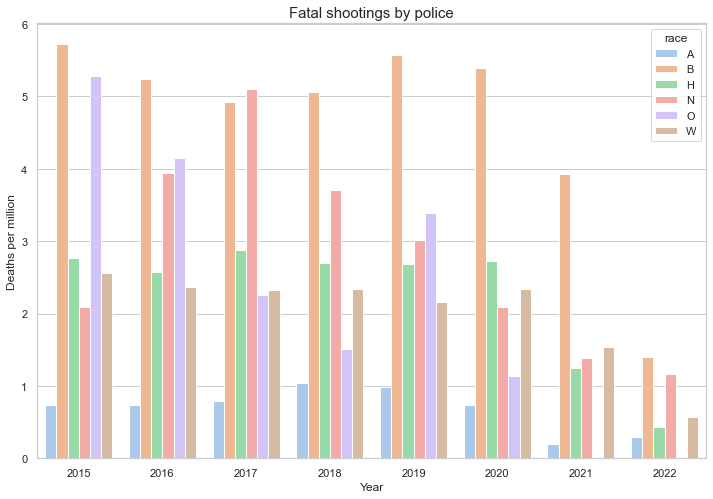

In [357]:
plt.figure(figsize=(12,8))
plt.title('Fatal shootings by police', fontsize=15)
sns.barplot(x='year', y='deaths_per_mil', hue='race', data=by_race)
plt.xlabel('Year')
plt.ylabel('Deaths per million')
plt.show()

In [358]:
df.race.unique()

array(['Asian', 'Hispanic', 'White', 'Native', 'Other', 'Black', 'None'],
      dtype=object)

In [359]:
# these numbers are skewed by the 'None' category for race 1,410 shootings total -- 18.52%

In [360]:
fig = px.histogram(by_race, x='year', y='deaths_per_mil', color='race', title='Percent of Fatal Shootings by Race (Excluding None)',
                  barnorm='percent', text_auto='.1f', category_orders={'race':['W', 'B', 'H', 'A', 'N', 'O']})
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide', xaxis_title='Year',
                  yaxis={"ticksuffix":"%"}, yaxis_title='Percent of Total Fatal Shootings', legend_title='Race')
fig.show()

In [361]:
# less Other in 2021 and 2022 and greater proportion of Hispanic and Black 

# what is this breakdown specifically for women?

In [362]:
# 343 fatal police shootings were of women
fem = df[df['gender'] == 'F']
# race breakdown
# account for population race proportions
race = {'White':'W','Black':'B', 'Hispanic':'H', 'Asian':'A', 'Native':'N','Other':'O', 'None':'No'}
fem_by_race = fem[['race','year','armed_3']].groupby(['race','year']).count().reset_index()
fem_by_race['race'] = fem_by_race['race'].map(race)
fem_by_race.rename(columns={'armed_3':'number_of_deaths'}, inplace=True)
#fem_by_race.head(20)

In [363]:
#fem_by_race = pd.merge(fem_by_race, pop, on='race')
#fem_by_race['deaths_per_mil'] = fem_by_race['number_of_deaths'] / (fem_by_race['2020_population']/2) 
# /2 b/c half pop is theoretically female

In [364]:
fem_by_race = fem_by_race.sort_values(by='year')

In [365]:
fem['race'].value_counts()/len(fem)

White       0.543353
Black       0.167630
None        0.150289
Hispanic    0.095376
Asian       0.020231
Native      0.014451
Other       0.008671
Name: race, dtype: float64

In [366]:
#df['race'].value_counts()
# (331.5*[0.593, 0.136, 0.189, 0.061, 0.013, 0.008]) == 196 W, 45 B, 63 H, 20 A, 4.3 N, 3 O 
#df[df['race']]
# if use this information, can make graphic simialr to last one on WaPo page

In [367]:
fig = px.bar(fem_by_race, x=fem_by_race.year, y='number_of_deaths', color='race', title='Fatal Shootings of Women by Race',
                  category_orders={'race':['W', 'B', 'H', 'A', 'N', 'O', 'No']}, text_auto='.1f')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide',
                  xaxis_title='Year', yaxis_title='Total Fatal Shootings of Women', legend_title='Race')
fig.show()

In [368]:
# an interesting pattern here

In [369]:
unarmed = df[df['armed_4'] == 'unarmed']
# 705 total unarmed
unarmed_by_race = unarmed['race'].value_counts()
unarmed_race_prop = unarmed_by_race/len(unarmed)

gun = df[df['armed_4'] == 'gun']
# 4414 total armed with gun
gun_by_race = gun['race'].value_counts()
gun_race_prop = gun_by_race/len(gun)

In [370]:
data['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', nan, 'shovel',
       'vehicle', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'undetermined', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'BB gun', 'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'railroad spikes',
       'stapler', 'beer bottle', 'unknown weapon', 'binoculars',
       'pellet gun', 'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'pair of scissors', 'pole', 'pick-axe', 'flashlight', 'baton',
       'spear', 'chair', 'pitchfork', 'hatchet and gun', 'rock',
       'piece of wood', 'pipe', 'glass shard', 'motorcycle',
       'pepper spray', 'metal rake

In [371]:
data.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

In [372]:
unarmed_race_prop

White       0.442060
Black       0.268956
Hispanic    0.170243
None        0.081545
Asian       0.017167
Native      0.012876
Other       0.007153
Name: race, dtype: float64

In [373]:
gun_race_prop

White       0.421265
Black       0.233288
None        0.187752
Hispanic    0.132122
Native      0.010767
Asian       0.010319
Other       0.004486
Name: race, dtype: float64

In [374]:
no_none = df.copy()
no_none = no_none[no_none['race'] != 'None']

In [375]:
no_none['race'].value_counts()/len(no_none)
# percentages change when None race is removed

White       0.509769
Black       0.268738
Hispanic    0.180493
Asian       0.017937
Native      0.015535
Other       0.007527
Name: race, dtype: float64

In [376]:
no_none_unarmed = no_none[no_none['armed_4'] == 'unarmed']
no_none_unarmed_by_race = no_none_unarmed['race'].value_counts()
no_none_unarmed_race_prop = no_none_unarmed_by_race/len(no_none_unarmed)

no_none_gun = no_none[no_none['armed_4'] == 'gun']
no_none_gun_by_race = no_none_gun['race'].value_counts()
no_none_gun_race_prop = no_none_gun_by_race/len(no_none_gun)

In [377]:
no_none_unarmed_race_prop

White       0.481308
Black       0.292835
Hispanic    0.185358
Asian       0.018692
Native      0.014019
Other       0.007788
Name: race, dtype: float64

In [378]:
no_none_gun_race_prop

White       0.518641
Black       0.287213
Hispanic    0.162662
Native      0.013256
Asian       0.012704
Other       0.005523
Name: race, dtype: float64

85% of deadly police shootings did not have body cam footage

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


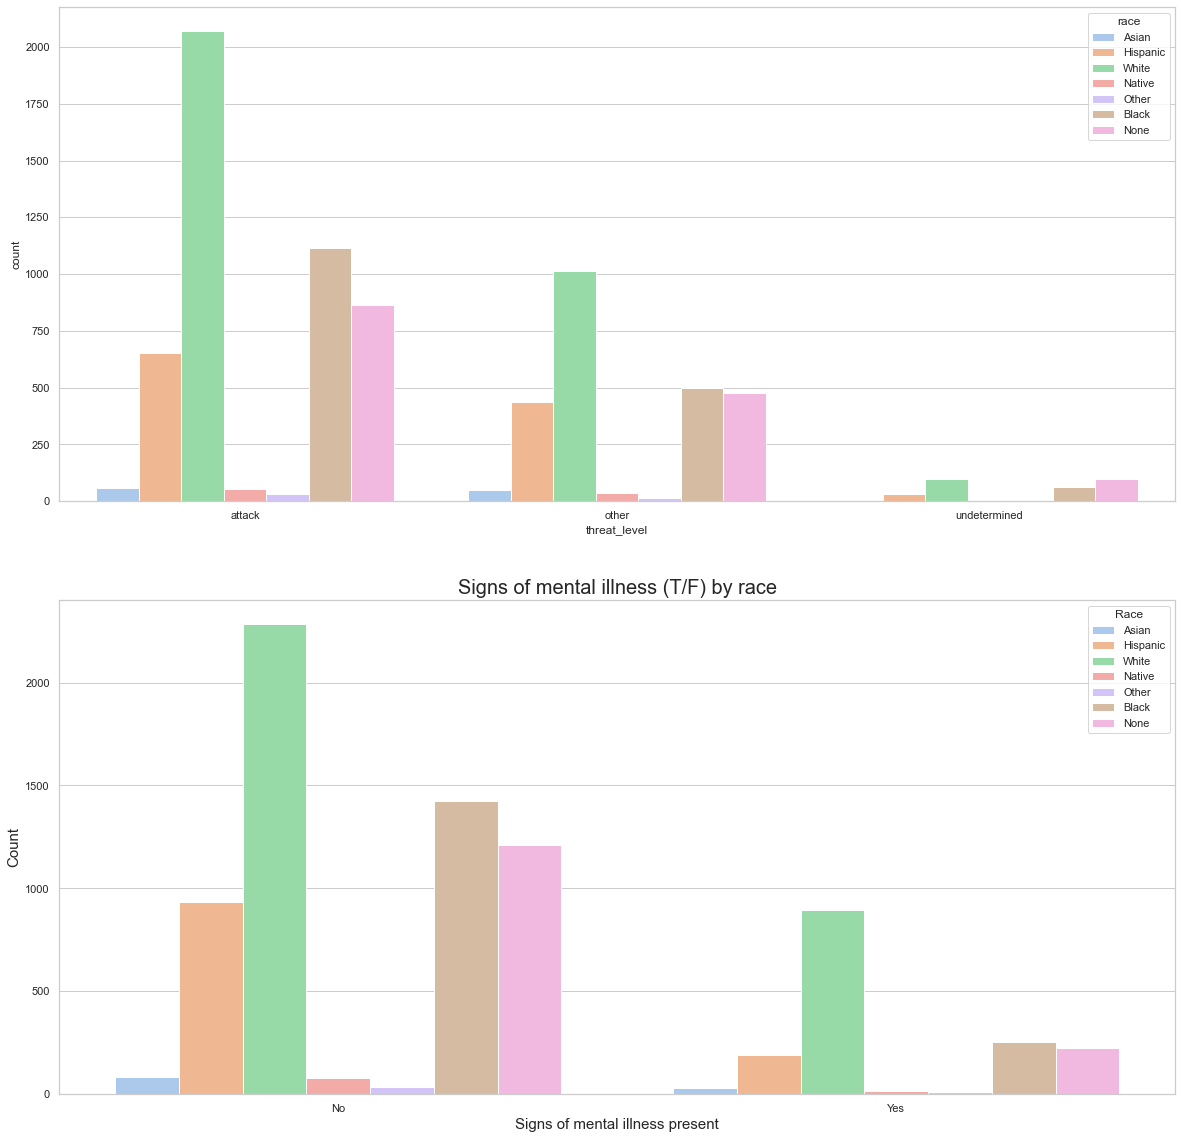

In [379]:
fig, ax = plt.subplots(2,1,figsize = (20,20))
#plt.rcParams['font.size'] = '25'

sns.countplot(x='threat_level', hue='race', data=df, ax=ax[0])
plt.title('Threat level by race', fontsize=20)
plt.xlabel('Threat level', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(title='Race')

sns.countplot(x='signs_of_mental_illness', hue='race', data=df, ax=ax[1])
plt.title('Signs of mental illness (T/F) by race', fontsize=20)
plt.xlabel('Signs of mental illness present', fontsize=15)
plt.xticks(ticks=[1,0],labels=['Yes', 'No'])
plt.ylabel('Count',fontsize=15)
plt.legend(title='Race')

#plt.tight_layout()
plt.show()

In [380]:
# adjust all of these for per 100,000 population ^^

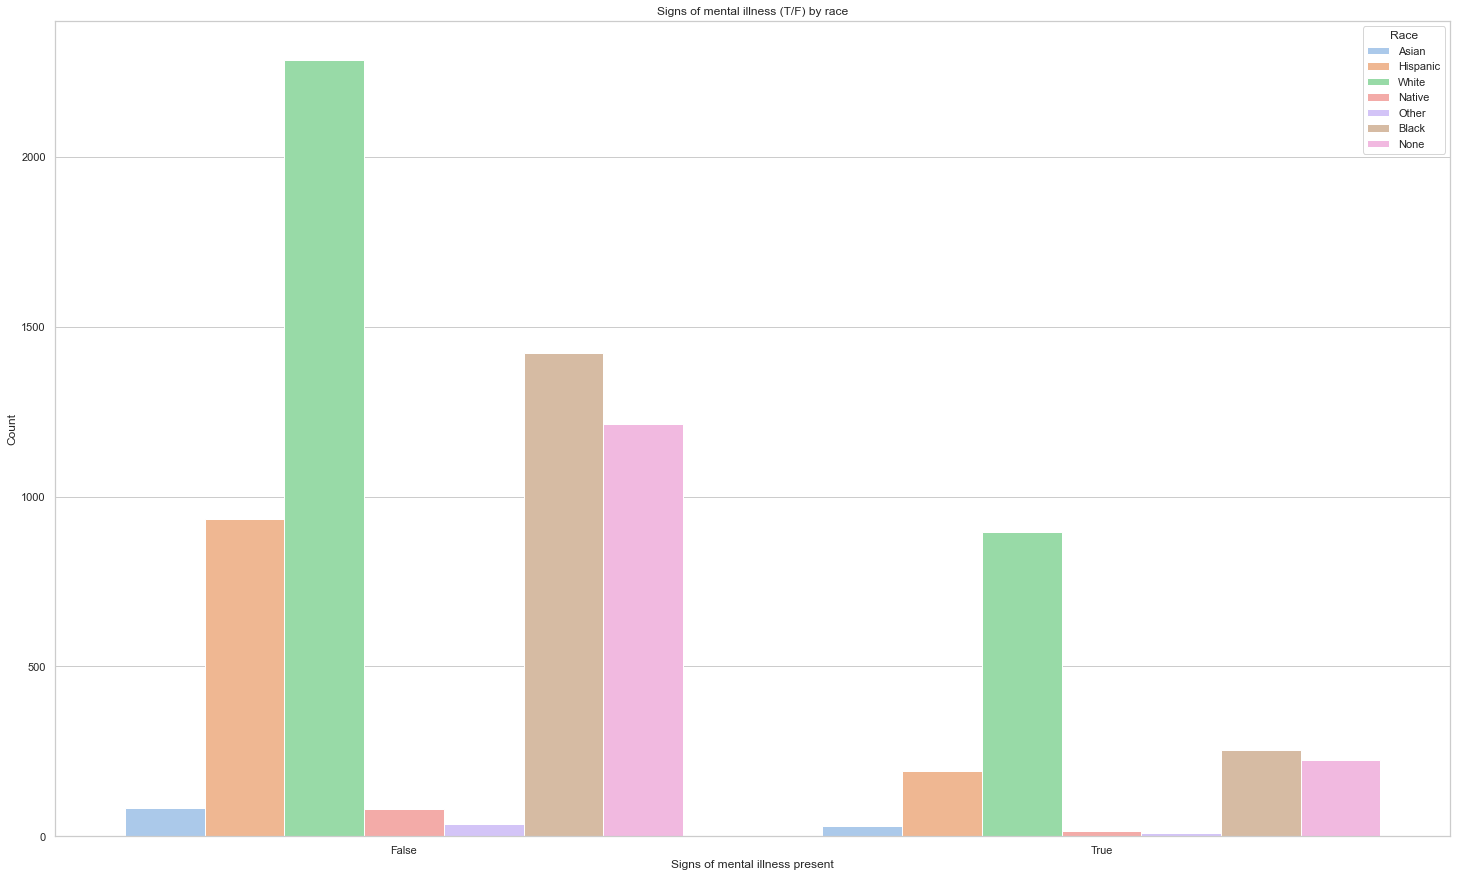

In [381]:
fig, ax = plt.subplots(figsize = (25,15))
plt.rcParams['font.size'] = '25'

sns.countplot(x='signs_of_mental_illness', hue='race', data=df)
plt.title('Signs of mental illness (T/F) by race')
plt.xlabel('Signs of mental illness present')
plt.ylabel('Count')
plt.legend(title='Race')
plt.show()

a significant number of shootings do not have race reported

In [382]:
# can use plotly cloropleth map for USA


In [383]:
# plot Race = 'None' by location
race_none = df[df['race'] == 'None']

In [384]:
df['city'].value_counts()

Los Angeles    126
Phoenix        101
Houston         85
San Antonio     66
Las Vegas       63
              ... 
Huntley          1
Superior         1
Dillon           1
Butte            1
Woonsocket       1
Name: city, Length: 3143, dtype: int64

In [385]:
df['city/state'].value_counts()

Los Angeles, CA    126
Phoenix, AZ        100
Houston, TX         84
San Antonio, TX     66
Las Vegas, NV       62
                  ... 
Mena, AR             1
Sims, AR             1
Farmington, AR       1
Dover, AR            1
Woonsocket, RI       1
Name: city/state, Length: 3616, dtype: int64

In [386]:
# difficult to separate city and state while making sure that citites with the same name don't add together

In [387]:
# compare proportion of shootings per state to country overall and plot

In [388]:
df.columns

Index(['date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city',
       'state', 'signs_of_mental_illness', 'threat_level', 'flee',
       'body_camera', 'is_geocoding_exact', 'age_binned_11_18',
       'age_binned_11_15', 'age_binned_10', 'age_binned_7', 'age_binned_8',
       'age_binned_6', 'armed_3', 'armed_4', 'armed_7', 'count', 'month',
       'year', 'quarter', 'state_name', 'PopEstimate2015', 'PopEstimate2016',
       'PopEstimate2017', 'PopEstimate2018', 'PopEstimate2019',
       'PopEstimate2020', 'PopEstimate2021', 'city/state'],
      dtype='object')

In [389]:
coord_df.columns

Index(['date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city',
       'state', 'signs_of_mental_illness', 'threat_level', 'flee',
       'body_camera', 'longitude', 'latitude', 'is_geocoding_exact',
       'age_binned_11_18', 'age_binned_11_15', 'age_binned_10', 'age_binned_7',
       'age_binned_8', 'age_binned_6', 'armed_3', 'armed_4', 'armed_7',
       'count', 'month', 'year', 'quarter', 'state_name', 'PopEstimate2015',
       'PopEstimate2016', 'PopEstimate2017', 'PopEstimate2018',
       'PopEstimate2019', 'PopEstimate2020', 'PopEstimate2021', 'city/state'],
      dtype='object')

In [390]:
tableau_df = coord_df.drop(columns=['month','year','quarter','is_geocoding_exact', 'state_name', 'city'])

In [391]:
tableau_df

date   manner_of_death       armed  age gender      race state  \
0    2015-01-02              shot         gun   53      M     Asian    WA   
1    2015-02-10  tasered and shot     unarmed   35      M  Hispanic    WA   
2    2015-03-19              shot     unarmed   20      M     White    WA   
3    2015-04-21              shot     unarmed   37      M    Native    WA   
4    2015-05-04              shot  toy weapon   36      M     White    WA   
...         ...               ...         ...  ...    ...       ...   ...   
7677 2016-06-13              shot         gun   80      M  Hispanic    RI   
7678 2017-11-09              shot     unknown   32      M     White    RI   
7679 2018-09-07              shot         gun   28      M     Black    RI   
7680 2021-11-22              shot         gun   32      M      None    RI   
7681 2022-04-27              shot     vehicle   58      M      None    RI   

      signs_of_mental_illness threat_level         flee  ...       armed_7  \
0                        True       attack  Not fleeing  ...           gun   
1                        True        other         Foot  ...       unarmed   
2                        True       attack  Not fleeing  ...       unarmed   
3                        True        other         Foot  ...       unarmed   
4                        True       attack  Not fleeing  ...    toy weapon   
...                       ...          ...          ...  ...           ...   
7677                    False       attack          Car  ...           gun   
7678                    False       attack          Car  ...       unknown   
7679                    False       attack      unknown  ...           gun   
7680                     True       attack  Not fleeing  ...           gun   
7681                    False       attack          Car  ...  other weapon   

      count  PopEstimate2015 PopEstimate2016 PopEstimate2017 PopEstimate2018  \
0         1          7163657         7294771         7423362         7523869   
1         1          7163657         7294771         7423362         7523869   
2         1          7163657         7294771         7423362         7523869   
3         1          7163657         7294771         7423362         7523869   
4         1          7163657         7294771         7423362         7523869   
...     ...              ...             ...             ...             ...   
7677      1          1056065         1056770         1055673         1058287   
7678      1          1056065         1056770         1055673         1058287   
7679      1          1056065         1056770         1055673         1058287   
7680      1          1056065         1056770         1055673         1058287   
7681      1          1056065         1056770         1055673         1058287   

     PopEstimate2019 PopEstimate2020 PopEstimate2021      city/state  
0            7614893         7718785         7738692     Shelton, WA  
1            7614893         7718785         7738692       Pasco, WA  
2            7614893         7718785         7738692       Sumas, WA  
3            7614893         7718785         7738692    Lakewood, WA  
4            7614893         7718785         7738692   Kennewick, WA  
...              ...             ...             ...             ...  
7677         1059361         1096229         1095610    Tiverton, RI  
7678         1059361         1096229         1095610  Providence, RI  
7679         1059361         1096229         1095610   Pawtucket, RI  
7680         1059361         1096229         1095610     Warwick, RI  
7681         1059361         1096229         1095610  Woonsocket, RI  

[7682 rows x 31 columns]

In [392]:
# export important dataframes as csv
# export important dataframes as csv
#dataframe = (by_race, perc_race, shot_by_state, adj_shot_by_state, shot_by_city, shot_by_race, d, cams_by_city, top20_cams,
 #top20_cams_by_year, fem_by_race, unarmed_by_race, gun_by_race, no_none)
#names = ('by_race', 'perc_race', 'shot_by_state', 'adj_shot_by_state', 'shot_by_city', 'shot_by_race', 'd', 'cams_by_city', 'top20_cams',
 #'top20_cams_by_year', 'fem_by_race', 'unarmed_by_race', 'gun_by_race', 'no_none')


#x = zip(names, dataframe)
#for (name, data) in x: 
    #df = data
    #name = name
    #path = f'{name}.csv'
    #df.to_csv(path)
    
df.to_csv(f'df.csv')
coord_df.to_csv(f'coord_df.csv')
by_race.to_csv(f'race_pop.csv')